importing necessary libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import numpy as np

dividing our dataset into training and testing dataset using keras.datasets

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

checking size of random values in dataset

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

plotting the first trainning image

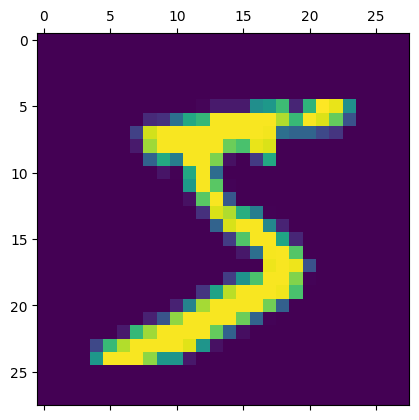

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

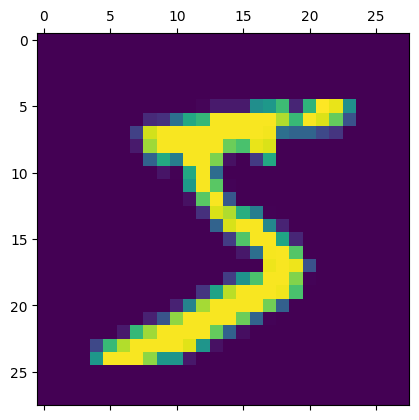

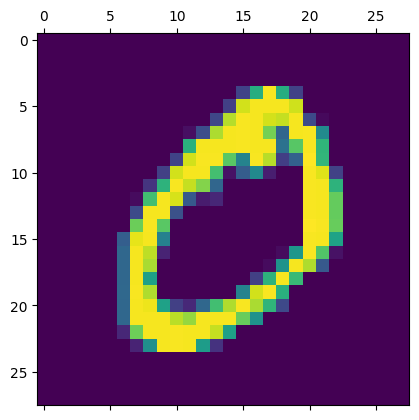

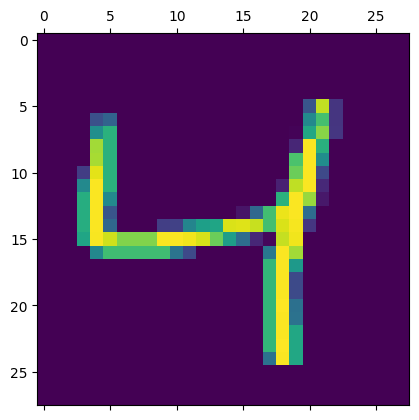

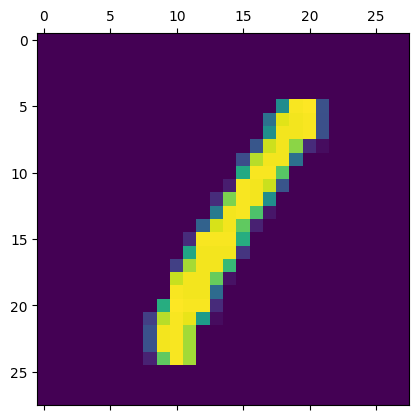

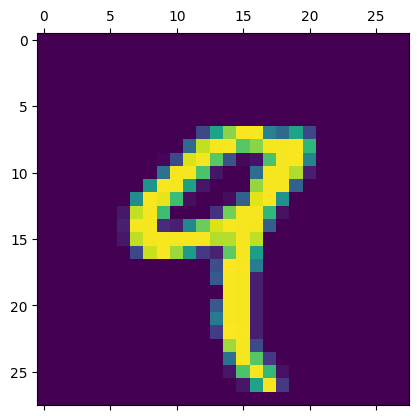

In [10]:
for i in range(5):
    plt.matshow(X_train[i])

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

now we would be flattening our array of 28x28 into a single array of size  784 pixels.

scaling our Xtrain and Xtest so that each of  them has  value between 0 and 1.

In [21]:
X_train= X_train/255
X_test= X_test/255

In [22]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [24]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

seeing our 1 d array

In [25]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

here we are using sequential which is a stack of layers .we then make a dense layer and give activation fxn sigmoid

In [26]:


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


adam basically is finding the best fit parameters weight and bias to obtain the lowest error,it takes big steps on parameters that change very slowly and small steps on parameters which change vastly.

In [27]:
model.compile(optimizer="adam",
              loss = 'sparse_categorical_crossentropy',
              metrics  = ["accuracy"]
              )

model.fit(X_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8164 - loss: 0.7169
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9145 - loss: 0.3082
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9201 - loss: 0.2884
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9244 - loss: 0.2723
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9269 - loss: 0.2642


In [28]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9111 - loss: 0.3094


[0.27252650260925293, 0.9225000143051147]

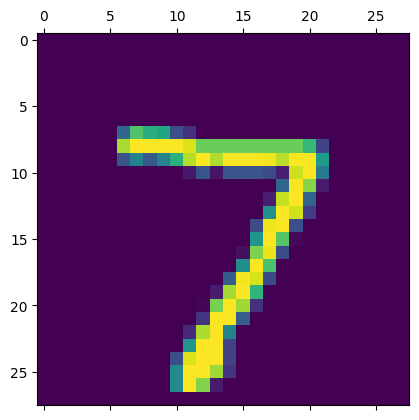

In [30]:
plt.matshow(X_test[0])

In [32]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [33]:
y_predicted[0]

array([3.7415359e-02, 3.3284158e-07, 4.9921338e-02, 9.6894050e-01,
       1.6143949e-03, 1.3790032e-01, 1.0814606e-06, 9.9977726e-01,
       7.9727069e-02, 6.2680471e-01], dtype=float32)

argmax shows the index of the the most accurate term.

In [34]:
np.argmax(y_predicted[0])

7

now  we will make our confusion matrix

first we haveto convert our y predicgted into a number

In [36]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [37]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [39]:
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    3,    2,    2,    0],
       [   0, 1115,    3,    3,    0,    1,    3,    2,    8,    0],
       [   7,    9,  901,   35,    7,    4,   13,   12,   41,    3],
       [   1,    0,   11,  945,    0,   19,    2,   11,   15,    6],
       [   1,    1,    4,    3,  915,    0,   10,    5,   10,   33],
       [   7,    1,    1,   47,    8,  773,   12,    6,   31,    6],
       [  12,    3,    4,    2,    7,   16,  910,    2,    2,    0],
       [   1,    6,   21,   10,    6,    1,    0,  960,    1,   22],
       [   7,    9,    6,   44,    9,   32,    8,   13,  841,    5],
       [  11,    7,    1,   15,   31,    5,    0,   35,    4,  900]])>

Text(95.72222222222221, 0.5, 'Truth')

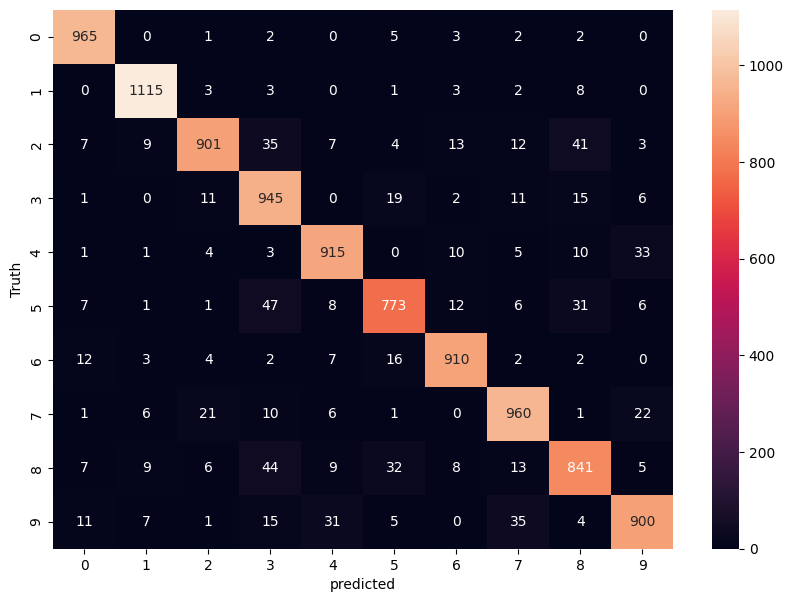

In [40]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot= True,fmt = "d")
plt.xlabel('predicted')
plt.ylabel('Truth')

to improve accuracy we make a dense layer and use activation function relu

In [41]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
    ])
model.compile(optimizer="adam",
              loss = 'sparse_categorical_crossentropy',
              metrics  = ["accuracy"]
              )

model.fit(X_train_flattened,y_train,epochs = 5)

c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8746 - loss: 0.4512
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9611 - loss: 0.1319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9736 - loss: 0.0892
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9810 - loss: 0.0647
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9848 - loss: 0.0504


In [42]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9723 - loss: 0.0939


[0.08190691471099854, 0.9760000109672546]

now we just repeat the whole code  again for the dense layer

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

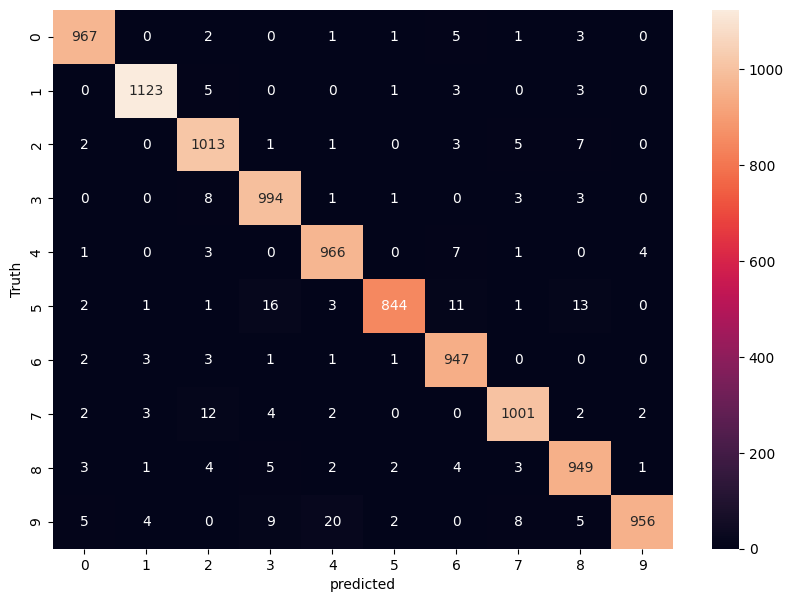

In [43]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot= True,fmt = "d")
plt.xlabel('predicted')
plt.ylabel('Truth')

now if we dont want to make through flattened layer:

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
    ])
model.compile(optimizer="adam",
              loss = 'sparse_categorical_crossentropy',
              metrics  = ["accuracy"]
              )

model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8744 - loss: 0.4468
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9625 - loss: 0.1291
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9736 - loss: 0.0902
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9810 - loss: 0.0602
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9860 - loss: 0.0492
